# Plot vectors (interpolated)

If you would like to try to repeat examples from this introduction, you can download FESOM2 data and mesh. The data are quite heavy, about 1.5Gb in bzip2 archive.

Link: https://swiftbrowser.dkrz.de/public/dkrz_c719fbc3-98ea-446c-8e01-356dac22ed90/PYFESOM2/

You have to download `LCORE2.tar` and `core2.tar.bz2` archives and extract them.


Alternative would be to use very light weight mesh that comes with pyfesom2 in the `tests/data/pi-grid/` and example data on this mesh in `tests/data/pi-results`.

In [1]:
import pyfesom2 as pf
import matplotlib.pylab as plt
import xarray as xr

In [2]:
meshpath  ='/Users/nkolduno/PYTHON/DATA/core2/'
alpha, beta, gamma=[0, 0, 0]
mesh=pf.load_mesh(meshpath, abg=[alpha, beta, gamma], usepickle = False, usejoblib=True)

joblib file not found in any default location, a try will be made to create it...
The usejoblib == True
The joblib file for FESOM2 DO NOT exists
Load 2d part of the mesh in 1 second(s)
The mesh will be saved to /Users/nkolduno/PYTHON/DATA/core2/joblib_mesh_py3_fesom2
Save mesh to binary format


In [3]:
datapath = '/Users/nkolduno/PYTHON/DATA/LCORE2/'

We need U and V components of the current. 

In [4]:
u = pf.get_data(datapath, 'u', [1955], mesh, depth = 0)
v = pf.get_data(datapath, 'v', [1955], mesh, depth = 0)

Model depth: 0.0
Model depth: 0.0


In FESOM2 the U and V are located on elements. To plot the data on regular grid we first have to interpolate from elements to nodes, and then to regular grid. Function `get_vector_forplot` will do the job. By defailt interpolation is done on the global 1defree grid. Coordinates of the target grid (`lonreg2`, `latreg2`) are also returned.

In [5]:
u_int, v_int, lonreg2, latreg2 = pf.get_vector_forplot(u,v, mesh)

And here is aour first vector plot:

[<GeoAxesSubplot:>]

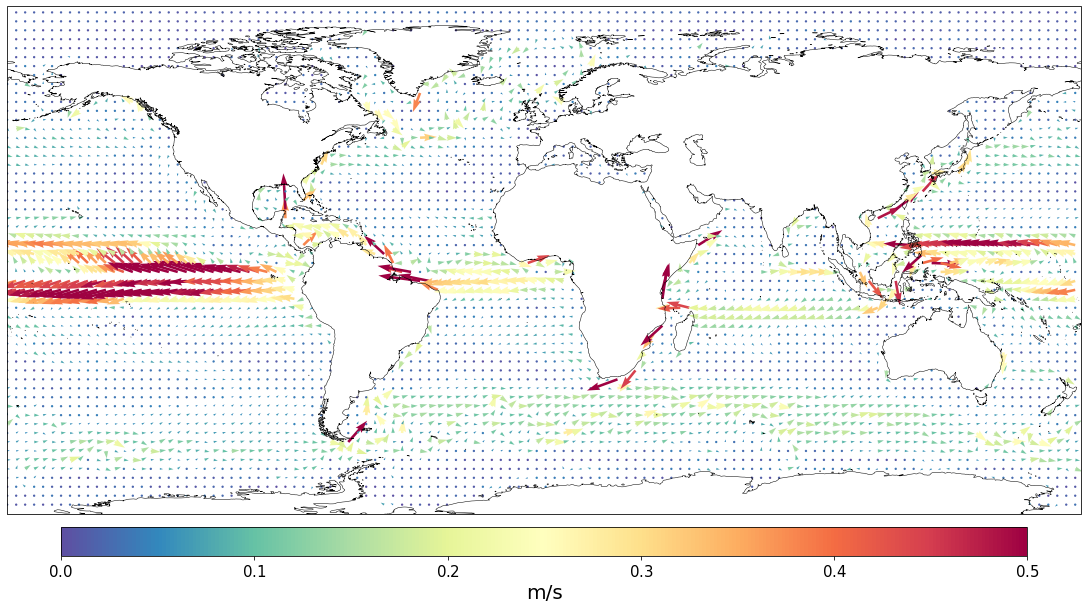

In [6]:
pf.plot_vector(u_int,  v_int, lonreg2, latreg2)

By defailt not every grid point of the target frid is shown. This is controled by the `sstep` parameter. By default it is equals 3. Let's change it to 1:

[<GeoAxesSubplot:>]

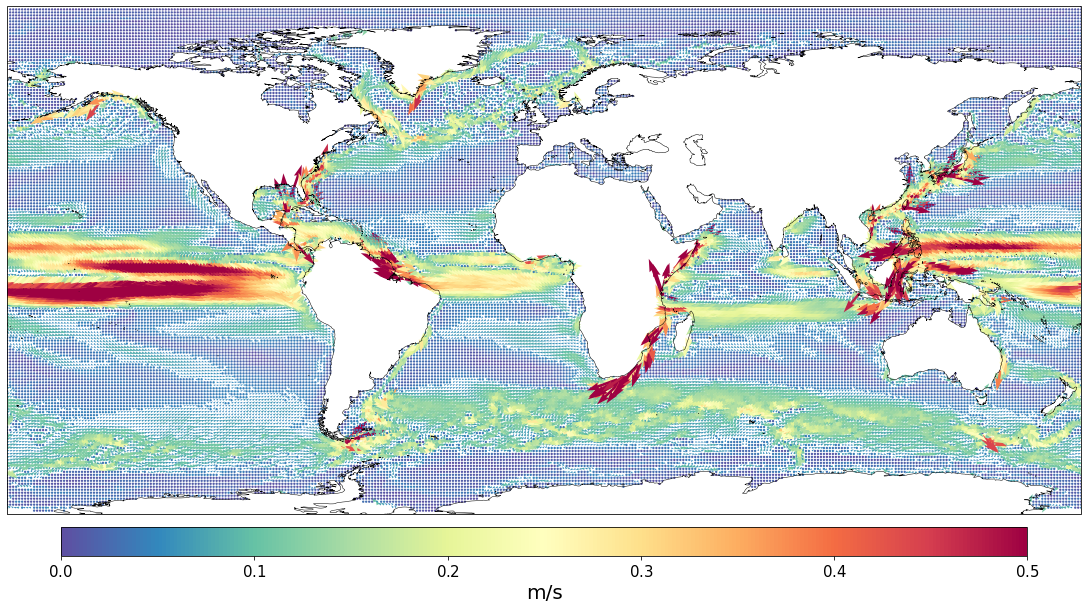

In [7]:
pf.plot_vector(u_int,  v_int, lonreg2, latreg2, sstep=1)

And now let's show every 10th vector.

[<GeoAxesSubplot:>]

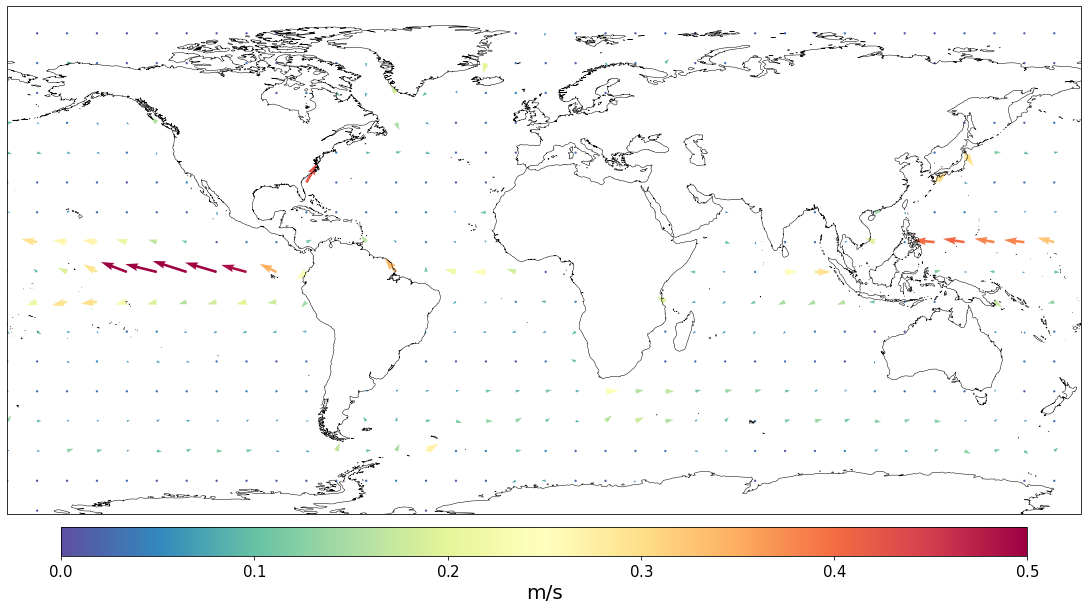

In [8]:
pf.plot_vector(u_int,  v_int, lonreg2, latreg2, sstep=10)

The size of the vectors controlled by the `scale` parameter. From the matplotlib quiver documentation: "`scale` - Number of data units per arrow length unit, e.g., m/s per plot width; **a smaller scale parameter makes the arrow longer**". Default is 20. Let's make the arrows longer:

[<GeoAxesSubplot:>]

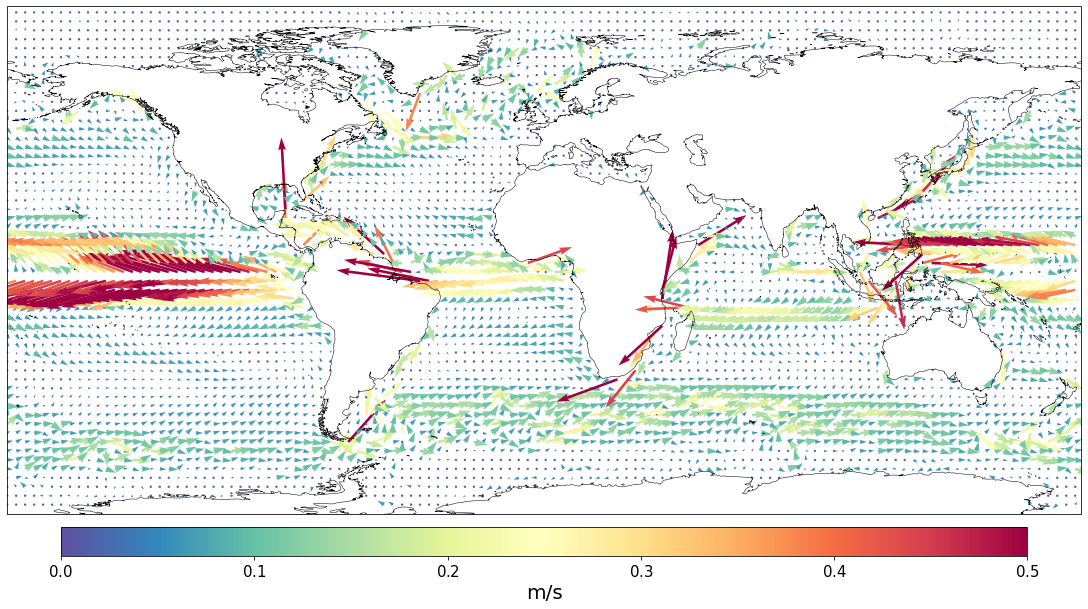

In [9]:
pf.plot_vector(u_int,  v_int, lonreg2, latreg2, scale=10)

We can zoom to some area by defining the `box` parameter. Note, in this case we are still working with the data interpolated on a global scale.

<ipython-input-10-bf71efd2ed10>:2: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig('./t.png') # trick to make the colarbar behave.


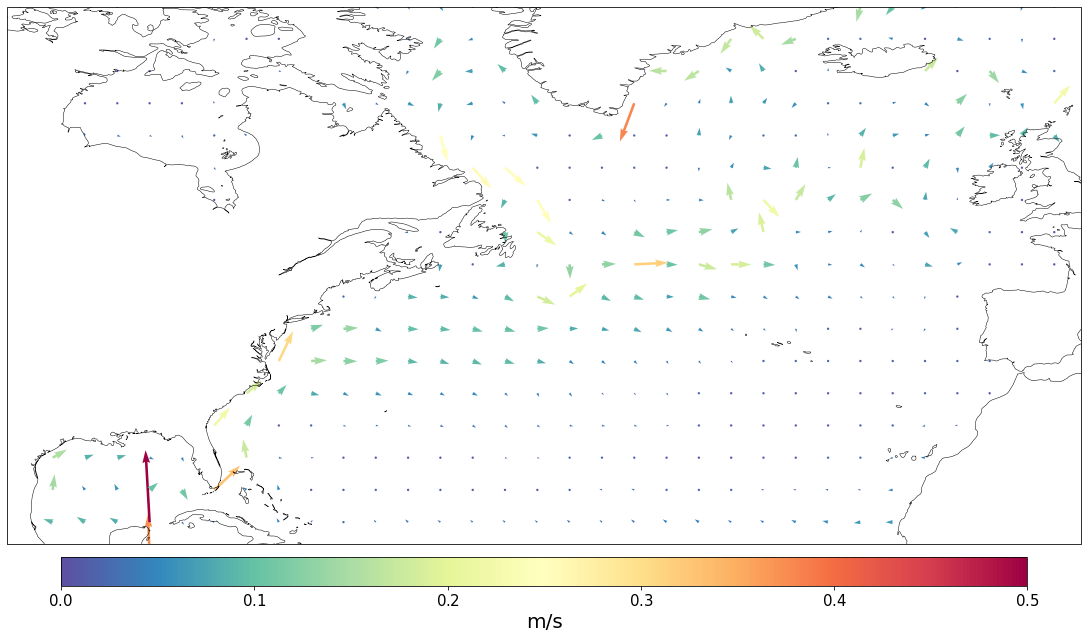

In [10]:
pf.plot_vector(u_int,  v_int, lonreg2, latreg2, scale=10, box=[-100, 0, 20, 70])
plt.savefig('./t.png') # trick to make the colarbar behave. 

Change the `scale` and the `sstep`.

<ipython-input-11-00e5759625d9>:2: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig('./t.png')


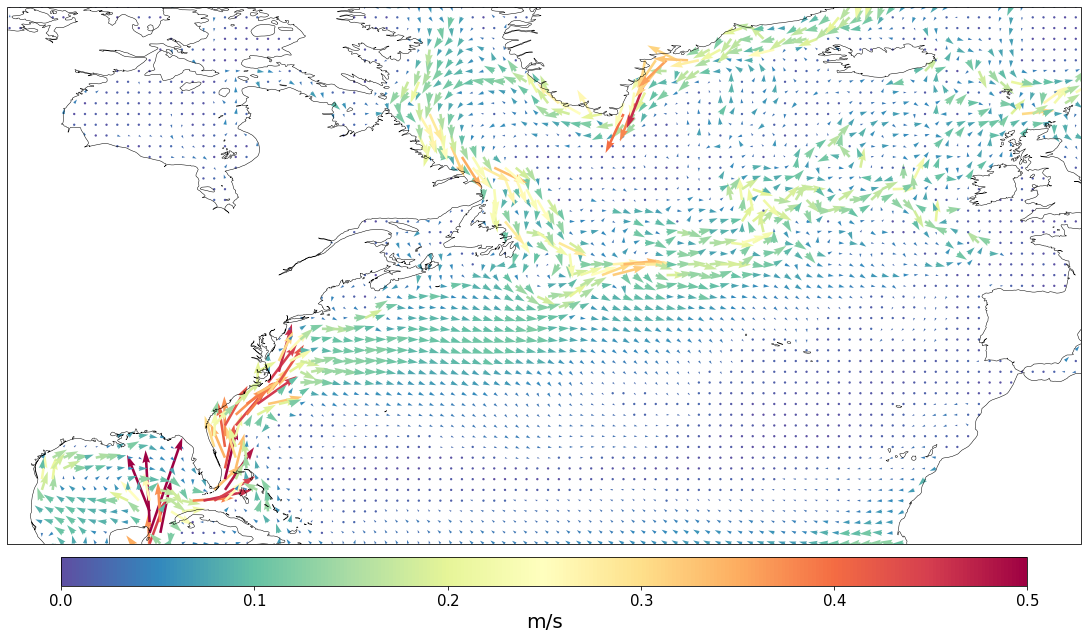

In [11]:
pf.plot_vector(u_int,  v_int, lonreg2, latreg2, sstep=1, scale=10, box=[-100, 0, 20, 70])
plt.savefig('./t.png')

Doing the same with polar projection will lead do not very satisfying results:

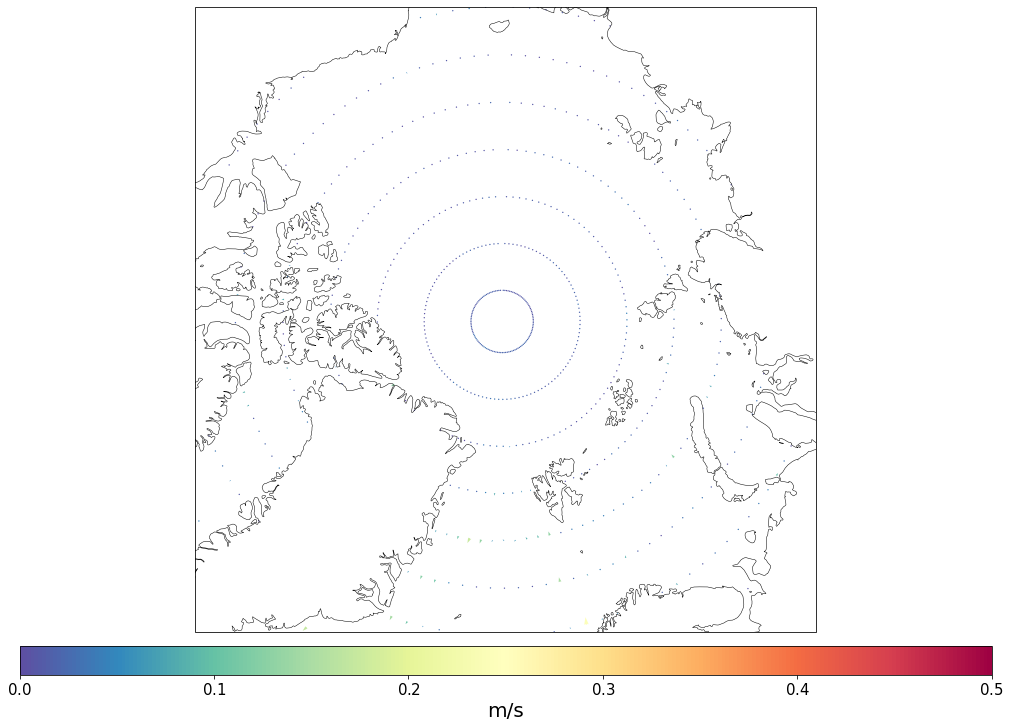

In [12]:
pf.plot_vector(u_int,  v_int, lonreg2, latreg2, box=[-180, 180, 70, 90], mapproj='np')
plt.savefig('./t.png')

And changing the `sstep` will not help here.

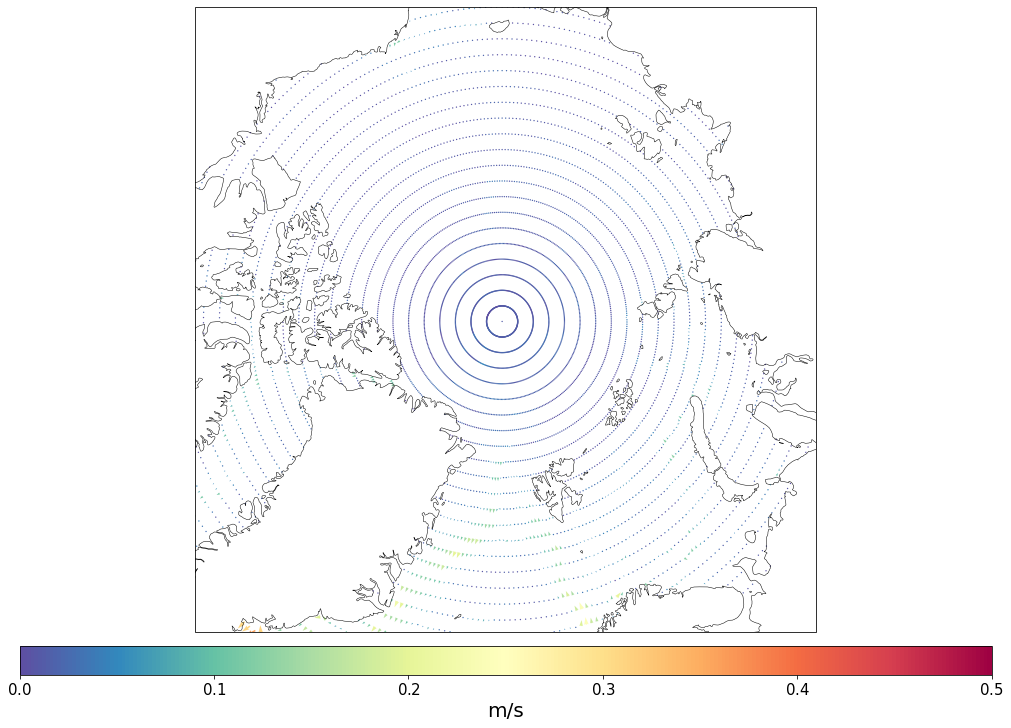

In [13]:
pf.plot_vector(u_int,  v_int, lonreg2, latreg2, box=[-180, 180, 70, 90], mapproj='np', sstep=1)
plt.savefig('./t.png')

One way is to reinterpolate the data, so that thye have more resolution in specific area (Arcti Ocean in our case). The number of points along lons and lats controlled by `res`.

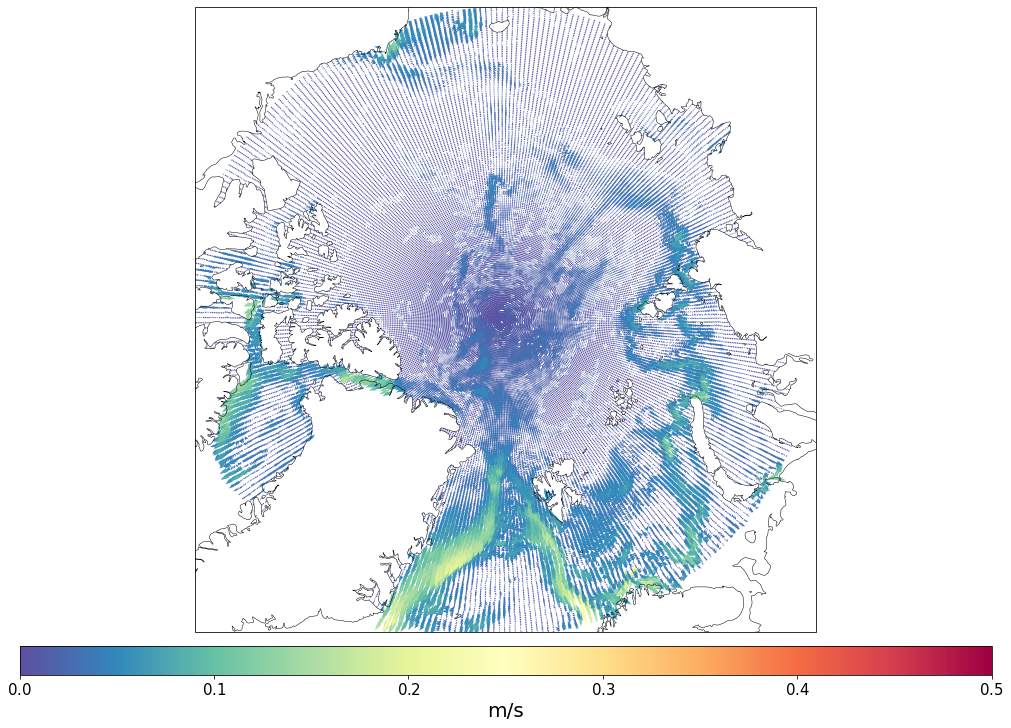

In [14]:
box=[-180, 180, 70, 90]
u_int, v_int, lonreg2, latreg2 = pf.get_vector_forplot(u,v, mesh, box=box, res = [360, 20*10])
pf.plot_vector(u_int,  v_int, lonreg2, latreg2, box, mapproj='np', sstep=1, scale=5)
plt.savefig('./t.png')

Another option is to use `cartopy` function `regrid_shape`, that interpolate directly on the projection. Note, that it will be interpolation of already interpolated data, so be careful with interpretation. 

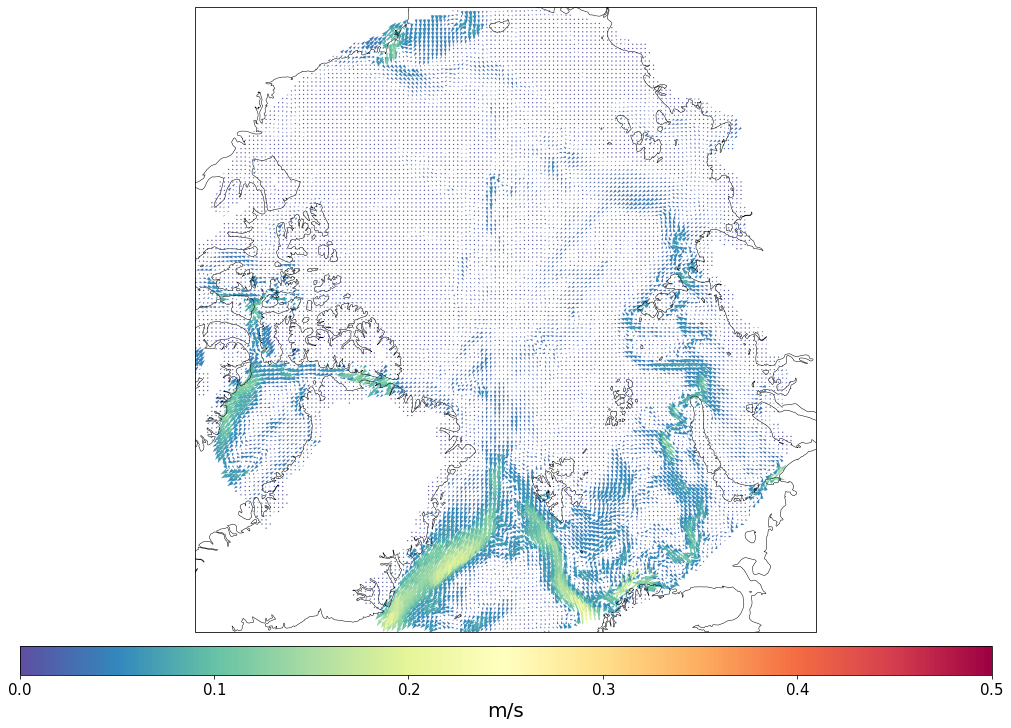

In [15]:
pf.plot_vector(u_int,  v_int, lonreg2, latreg2, box, mapproj='np', sstep=1, regrid_shape=150, scale=5)
plt.savefig('./t.png')

Let's use some other depth. First with cartopy additional interpolation:

Model depth: 410.0
Model depth: 410.0


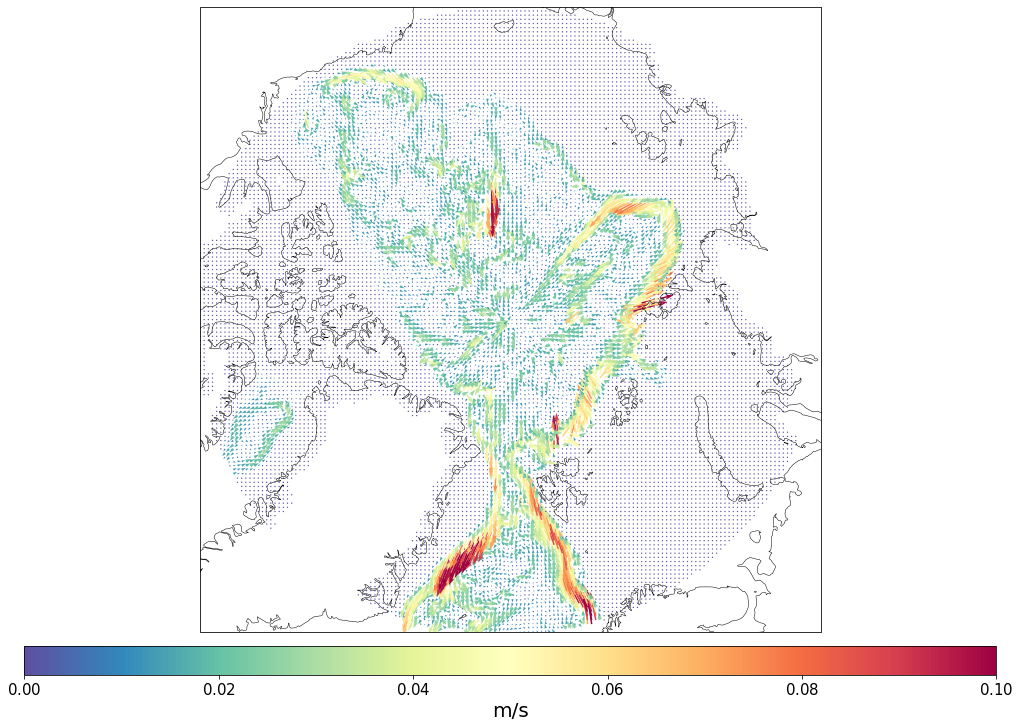

In [16]:
u = pf.get_data('/Users/nkolduno/PYTHON/DATA/LCORE2/', 'u', [1955], mesh, depth = 400)
v = pf.get_data('/Users/nkolduno/PYTHON/DATA/LCORE2/', 'v', [1955], mesh, depth = 400)
box=[-180, 180, 70, 90]
u_int, v_int, lonreg2, latreg2 = pf.get_vector_forplot(u,v, mesh, box=box,res = [360, 20*10])
pf.plot_vector(u_int,  v_int, lonreg2, latreg2, box, mapproj='np', sstep=1, regrid_shape=150, scale=2, vmin=0, vmax=0.1)
plt.savefig('./t.png')

And then without:

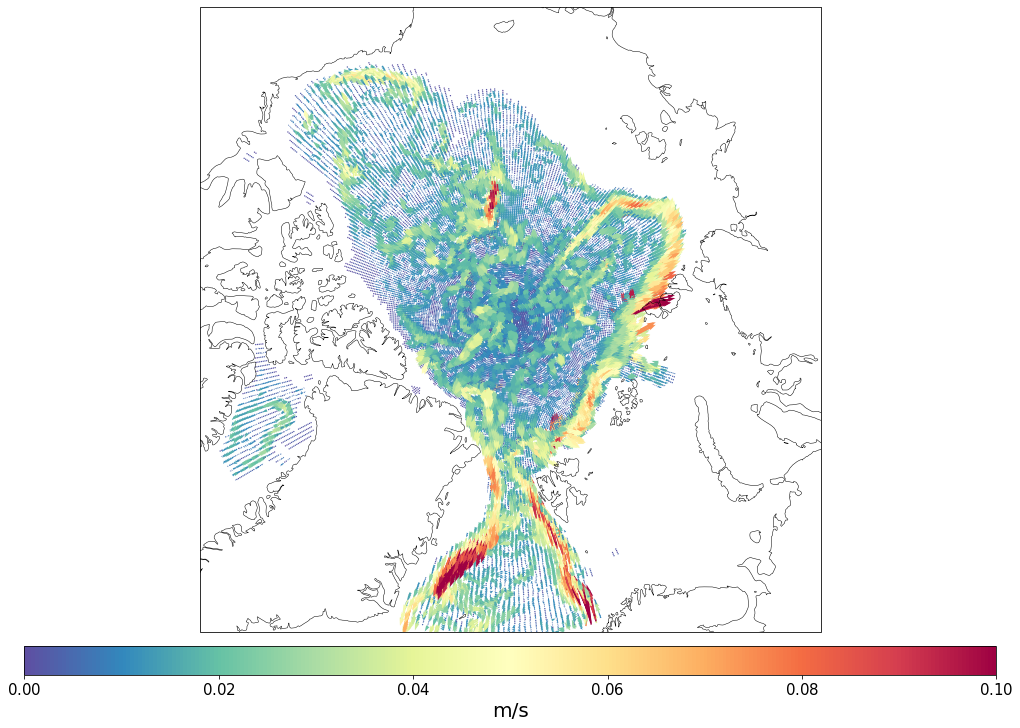

In [17]:
pf.plot_vector(u_int,  v_int, lonreg2, latreg2, box, mapproj='np', sstep=1, scale=2, vmin=0, vmax=0.1)
plt.savefig('./t.png')

One obvious plus of original interpolation is that the masking of places shallower than our target depth is working :)

At the end of the day one can use some custom set of lats/lons. Then you should provide 2D coordinated to `lonreg2` and `latreg2` parameters.

In [18]:
r = xr.open_dataset('../../GRIDS/NSIDC/polar_stereo_25.nc')

In [19]:
u_int, v_int, lonreg2, latreg2 = pf.get_vector_forplot(u,v, mesh,box=[-180, 180, 70, 90],
                                                       lonreg2=r.lon.data, latreg2=r.lat.data)

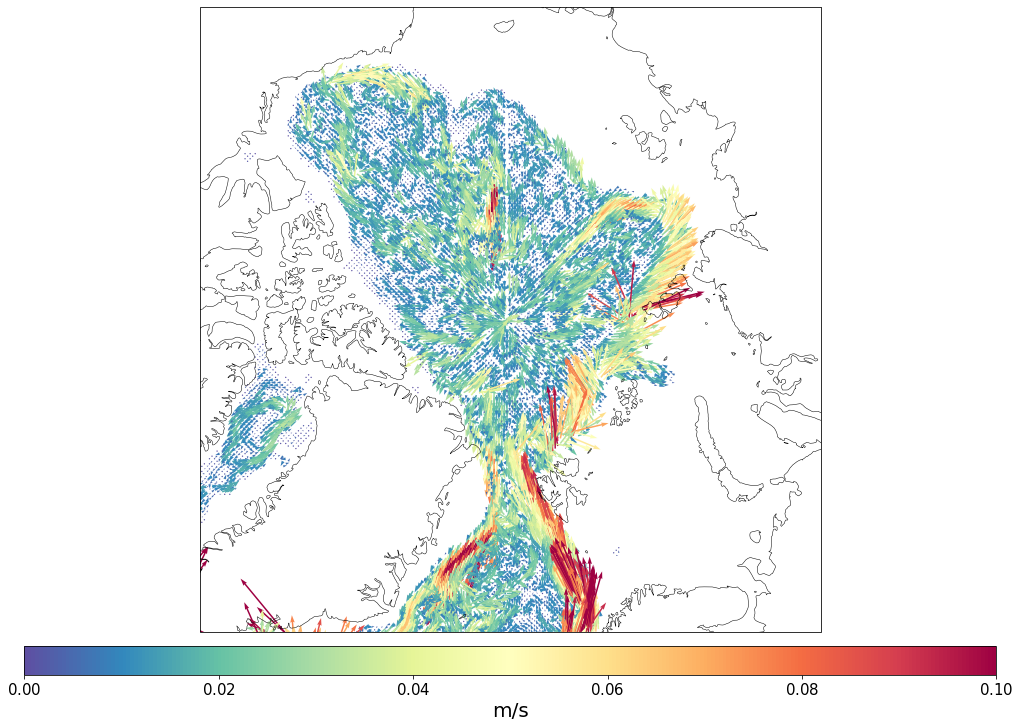

In [20]:
box=[-180, 180, 70, 90]
pf.plot_vector(u_int,  v_int, lonreg2, latreg2, box, mapproj='np', sstep=1, scale=1, vmin=0, vmax=0.1)
plt.savefig('./t.png')

And the last point is demonstration for the southern ocean:

Model depth: 100.0
Model depth: 100.0


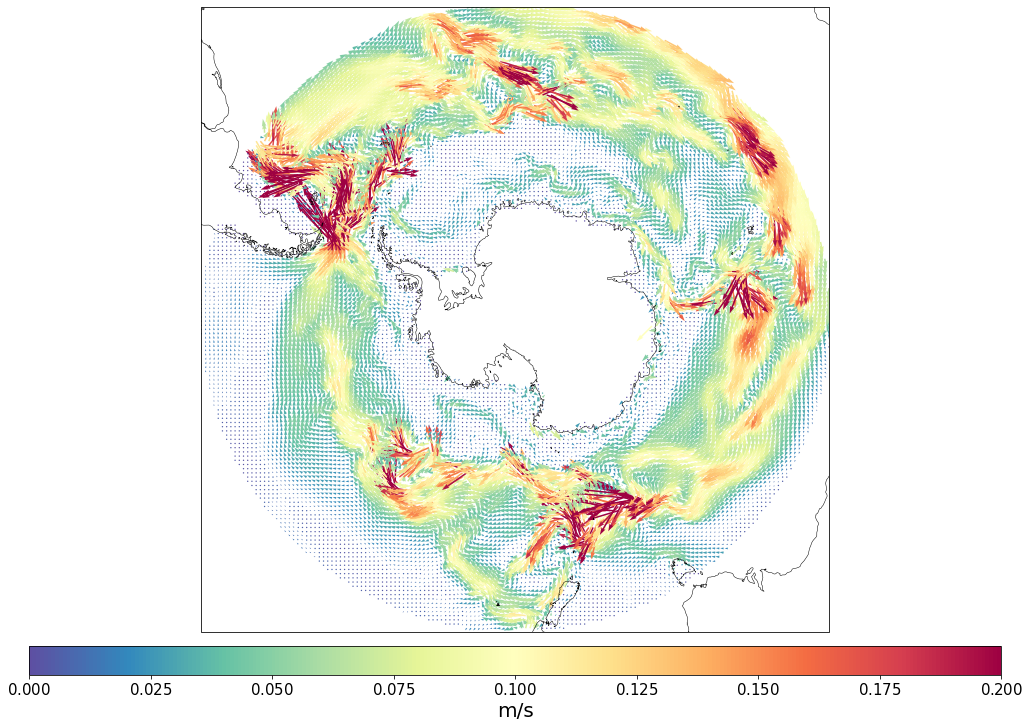

In [21]:
u = pf.get_data('/Users/nkolduno/PYTHON/DATA/LCORE/', 'u', [1955], mesh, depth = 100)
v = pf.get_data('/Users/nkolduno/PYTHON/DATA/LCORE/', 'v', [1955], mesh, depth = 100)
box=[-180, 180, -90, -40]
u_int, v_int, lonreg2, latreg2 = pf.get_vector_forplot(u,v, mesh, box=box)
pf.plot_vector(u_int,  v_int, lonreg2, latreg2, box, mapproj='sp', sstep=1, regrid_shape=150, scale=4, vmin=0, vmax=0.2)
plt.savefig('./t.png')